In [439]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from sklearn.model_selection import train_test_split

In [440]:
df = pd.read_csv("MicrosoftStock.csv")

In [441]:
df.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [443]:
df.isnull().sum()

index     0
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [444]:
df.shape

(1259, 8)

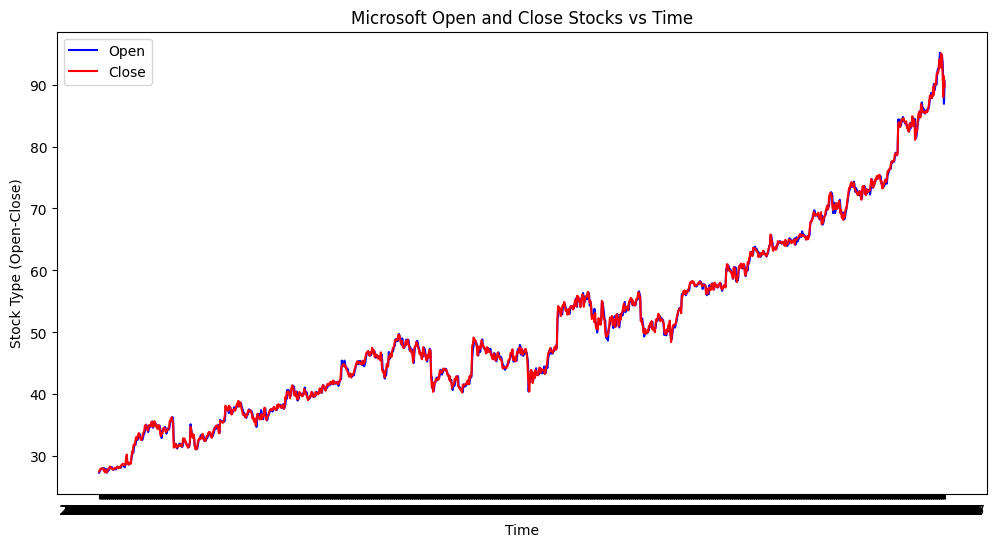

In [445]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["open"], label="Open", color="blue")
plt.plot(df["date"], df["close"], label="Close", color="red")
plt.title("Microsoft Open and Close Stocks vs Time")
plt.xlabel("Date")
plt.ylabel("Stock Type (Open-Close)")
plt.legend()
plt.show()


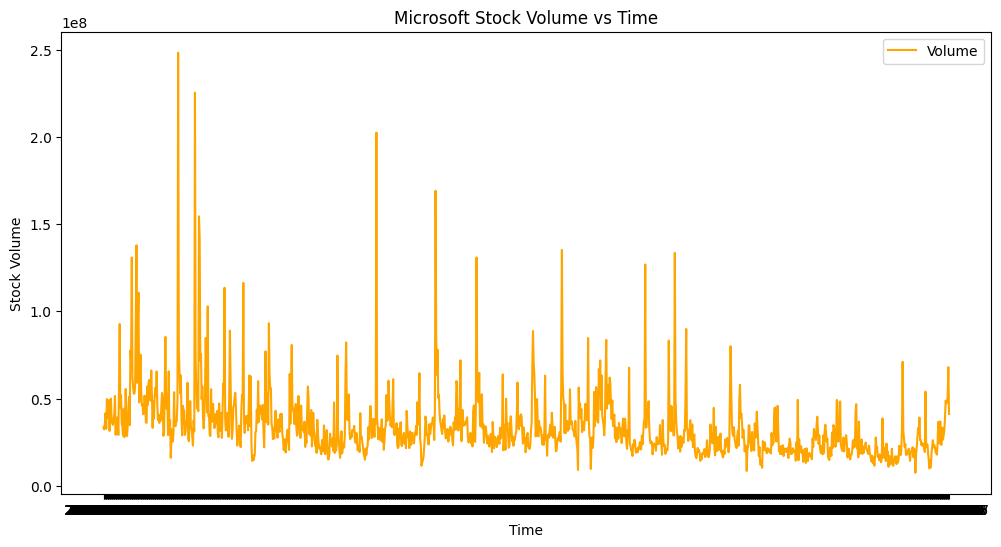

In [446]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["volume"], label="Volume", color="orange")
plt.title("Microsoft Stock Volume vs Date")
plt.xlabel("Date")
plt.ylabel("Stock Volume")
plt.legend()
plt.show()

In [447]:
df["volume"].isnull().sum()

0

In [448]:
df_numeric = df.drop(columns=["Name", "date"])

In [449]:
df_numeric.head()

,index,open,high,low,close,volume
0,390198,27.35,27.71,27.31,27.55,33318306
1,390199,27.65,27.92,27.50,27.86,32247549
2,390200,27.88,28.00,27.75,27.88,35990829
3,390201,27.93,28.11,27.88,28.03,41715530
4,390202,27.92,28.06,27.87,28.04,32663174


Text(0.5, 1.0, 'Numeric Data Correlation Heatmap')

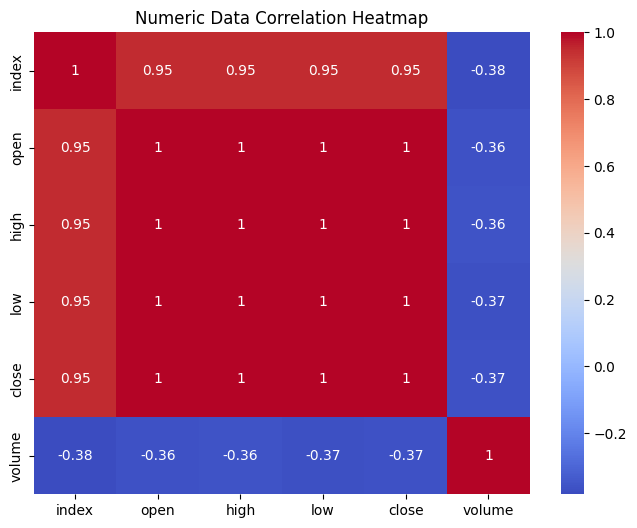

In [450]:
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Numeric Data Correlation Heatmap")

In [451]:
df["date"] = pd.to_datetime(df["date"])

In [452]:
prediction = df.loc[
    (df["date"] > datetime(2013, 1, 1)) &
    (df["date"] < datetime(2018, 1, 1)) 
]

In [453]:
prediction.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [454]:
prediction.tail()

,index,date,open,high,low,close,volume,Name
1228,391426,2017-12-22,85.40,85.6300,84.920,85.51,14145841,MSFT
1229,391427,2017-12-26,85.31,85.5346,85.030,85.40,9891237,MSFT
1230,391428,2017-12-27,85.65,85.9800,85.215,85.71,14678025,MSFT
1231,391429,2017-12-28,85.90,85.9300,85.550,85.72,10594344,MSFT
1232,391430,2017-12-29,85.63,86.0500,85.500,85.54,18717406,MSFT


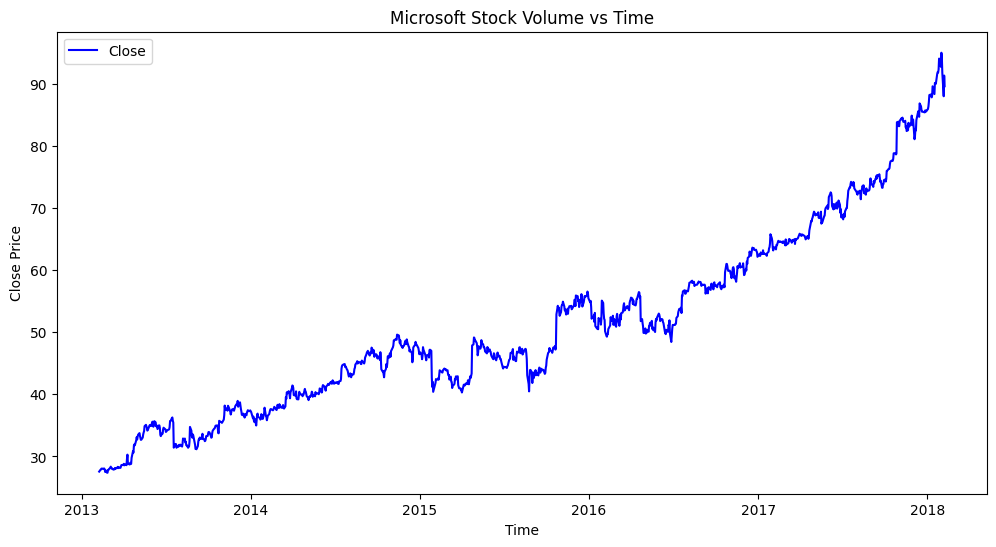

In [455]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["close"], label="Close", color="blue")
plt.title("Microsoft Stock Volume vs Date")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [456]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [457]:
close_prices = df['close'].values
sequence_length = 60 
X, y = create_sequences(close_prices, sequence_length)

In [458]:
X.shape

(1199, 60)

In [459]:
y.shape

(1199,)

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [461]:
len(X_train)

959

In [462]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [463]:
len(X_train)

959

In [464]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])

X_train_scaled = scaler_X.fit_transform(X_train_reshaped)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

X_test_scaled = scaler_X.transform(X_test_reshaped)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

X_train_scaled = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test.shape[0], X_test.shape[1], 1)

y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

In [465]:
model = keras.models.Sequential()

model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.Dropout(0.2)) 
model.add(keras.layers.LSTM(64, return_sequences=False))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

c:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [466]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                  │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [467]:
model.compile(
    optimizer="adam",
    loss="mae",
    metrics=[keras.metrics.RootMeanSquaredError()]
)

In [468]:
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=50,
    batch_size=32
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4500 - root_mean_squared_error: 0.5894
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4500 - root_mean_squared_error: 0.5894
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1904 - root_mean_squared_error: 0.2563
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1904 - root_mean_squared_error: 0.2563
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1600 - root_mean_squared_error: 0.2133
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1600 - root_mean_squared_error: 0.2133
Epoch 4/50
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1615 - root_mean_squared_error: 0.2164
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1615 - root_mean_squared_error: 0.2164
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1639 - root_mean_squared_error: 0.2160
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1639 - root_mean_squared_error: 0.2160


In [469]:
stock_predictions_scaled = model.predict(X_test_scaled)

final_predictions = scaler_y.inverse_transform(stock_predictions_scaled)
actual_test_prices = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


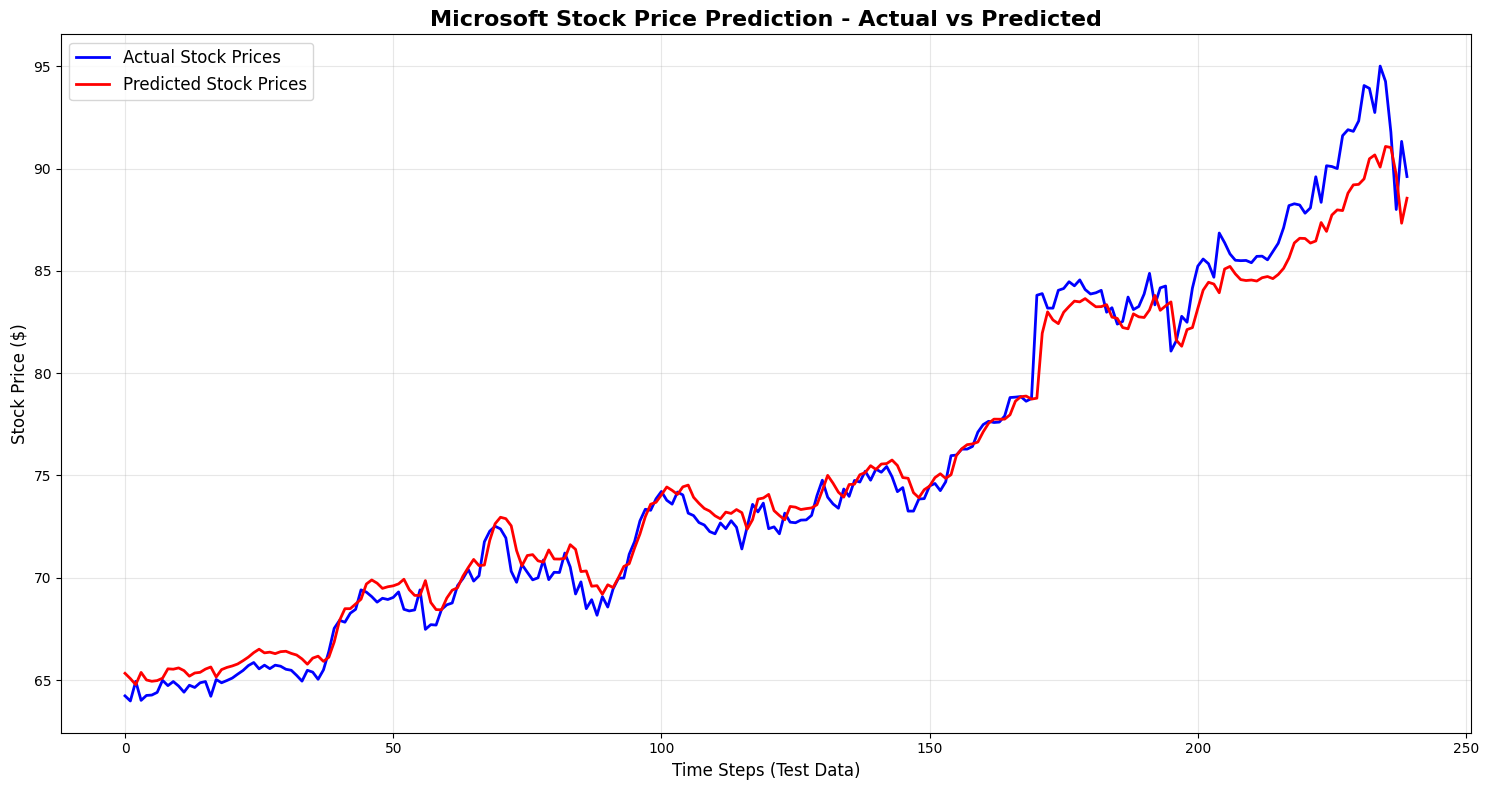

In [470]:

plt.figure(figsize=(15, 8))
plt.plot(actual_test_prices.flatten(), label='Actual Stock Prices', color='blue', linewidth=2)
plt.plot(final_predictions.flatten(), label='Predicted Stock Prices', color='red', linewidth=2)
plt.title('Microsoft Stock Price Prediction - Actual vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Time Steps (Test Data)', fontsize=12)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

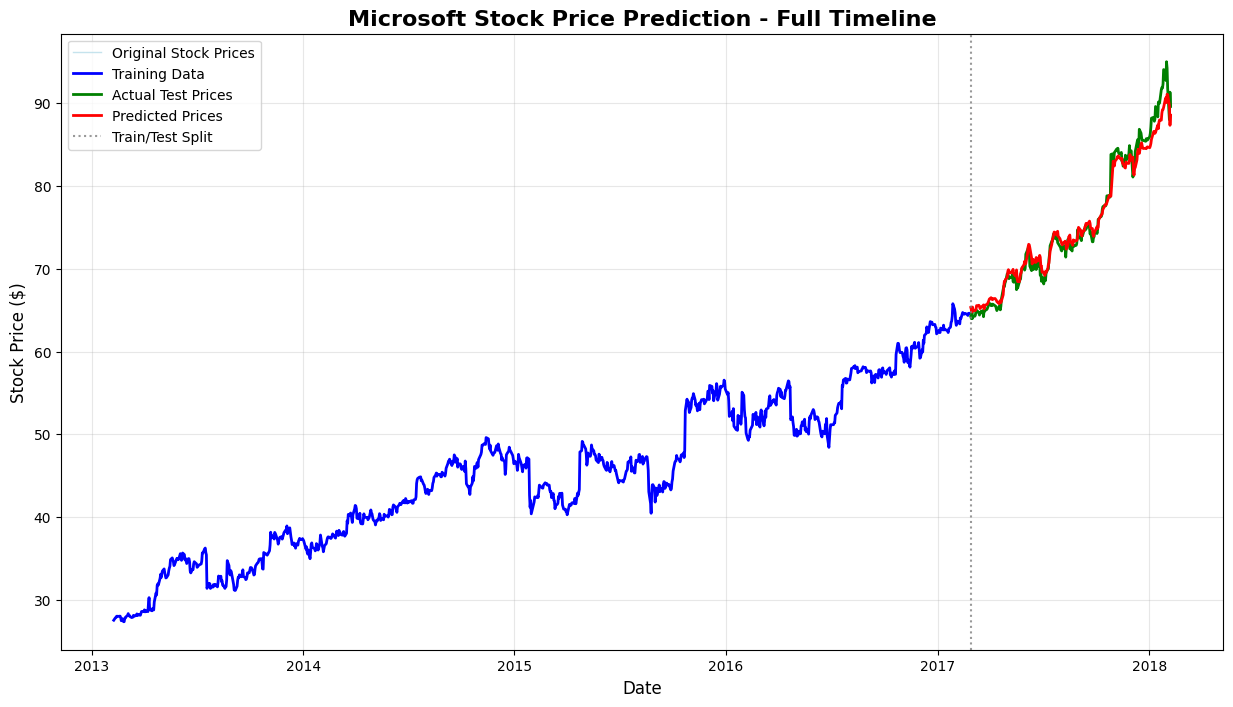

In [480]:
plt.figure(figsize=(15, 8))

train_size = len(X_train)
total_sequences = len(X) + sequence_length
prediction_start_idx = train_size + sequence_length

test_start_date_idx = prediction_start_idx
test_dates = df['date'].iloc[test_start_date_idx:test_start_date_idx + len(final_predictions)]

plt.plot(df['date'], df['close'], label='Original Stock Prices', color='lightblue', linewidth=1, alpha=0.7)

train_end_idx = train_size + sequence_length
plt.plot(df['date'].iloc[:train_end_idx], df['close'].iloc[:train_end_idx], label='Training Data', color='blue', linewidth=2)

plt.plot(test_dates, actual_test_prices.flatten(), label='Actual Test Prices', color='green', linewidth=2)

plt.plot(test_dates, final_predictions.flatten(), label='Predicted Prices', color='red', linewidth=2)

plt.axvline(x=df['date'].iloc[train_end_idx], color='gray', linestyle=':', label='Train/Test Split', alpha=0.8)

plt.title('Microsoft Stock Price Prediction - Full Timeline', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

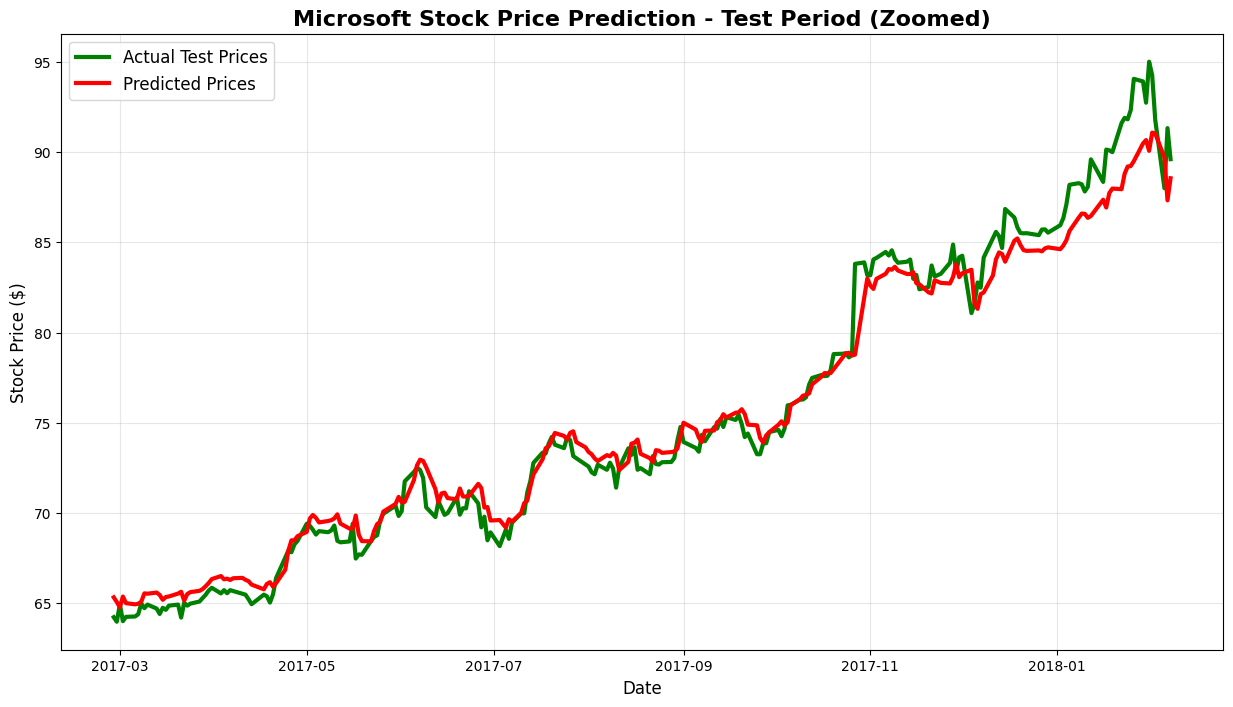

In [485]:
plt.figure(figsize=(15, 8))

plt.plot(test_dates, actual_test_prices.flatten(), 
         label='Actual Test Prices', color='green', linewidth=3)
plt.plot(test_dates, final_predictions.flatten(), 
         label='Predicted Prices', color='red', linewidth=3)

plt.title('Microsoft Stock Price Prediction - Test Period (Zoomed)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

In [483]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [484]:
mse = mean_squared_error(actual_test_prices.flatten(), final_predictions.flatten())
mae = mean_absolute_error(actual_test_prices.flatten(), final_predictions.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(actual_test_prices.flatten(), final_predictions.flatten())

print(f"\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {np.mean(np.abs((actual_test_prices.flatten() - final_predictions.flatten()) / actual_test_prices.flatten())) * 100:.2f}%")


Model Performance Metrics:
Mean Squared Error (MSE): 1.5619
Mean Absolute Error (MAE): 0.9082
Root Mean Squared Error (RMSE): 1.2498
R² Score: 0.9764
Mean Absolute Percentage Error (MAPE): 1.17%
